In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used       

In [8]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values per Column:")
print(missing_df)


Missing Values per Column:
                        Missing Values  Percentage
Customer ID                          0         0.0
Age                                  0         0.0
Gender                               0         0.0
Item Purchased                       0         0.0
Category                             0         0.0
Purchase Amount (USD)                0         0.0
Location                             0         0.0
Size                                 0         0.0
Color                                0         0.0
Season                               0         0.0
Review Rating                        0         0.0
Subscription Status                  0         0.0
Shipping Type                        0         0.0
Discount Applied                     0         0.0
Promo Code Used                      0         0.0
Previous Purchases                   0         0.0
Payment Method                       0         0.0
Frequency of Purchases               0         0.0


In [12]:
if 'Customer ID' in df.columns:
    df.drop(columns=['Customer ID'], inplace=True)

In [13]:
# Check data types and unique values for categorical columns
print("\nCategorical Column Analysis:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Column Analysis:
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


In [14]:
# Descriptive statistics for numerical columns
print("\nNumerical Column Analysis:")
print(df.describe())


Numerical Column Analysis:
               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


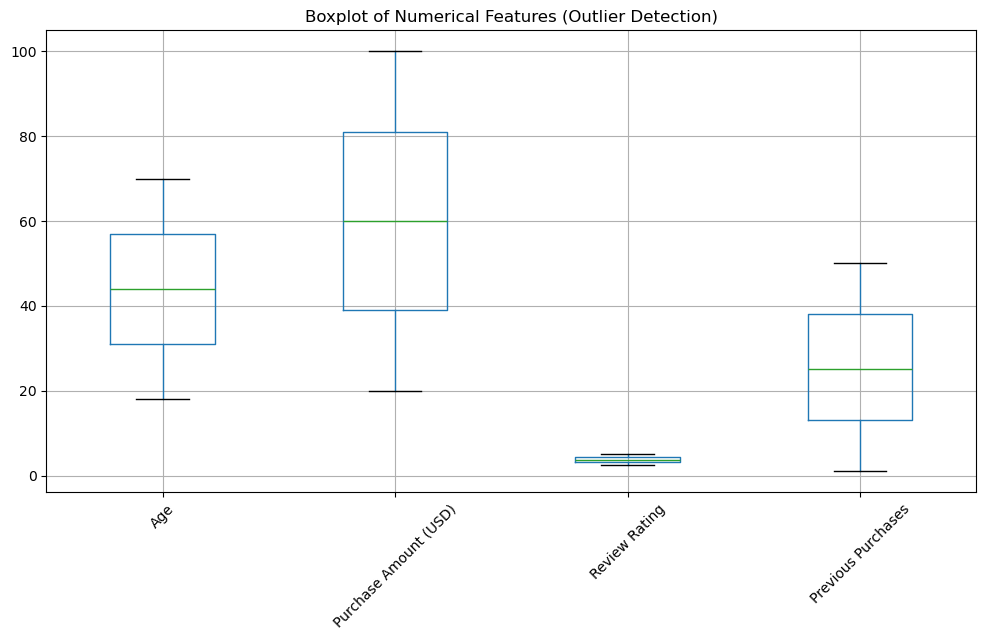

In [15]:
# Detect outliers using boxplots
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['int64', 'float64']).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

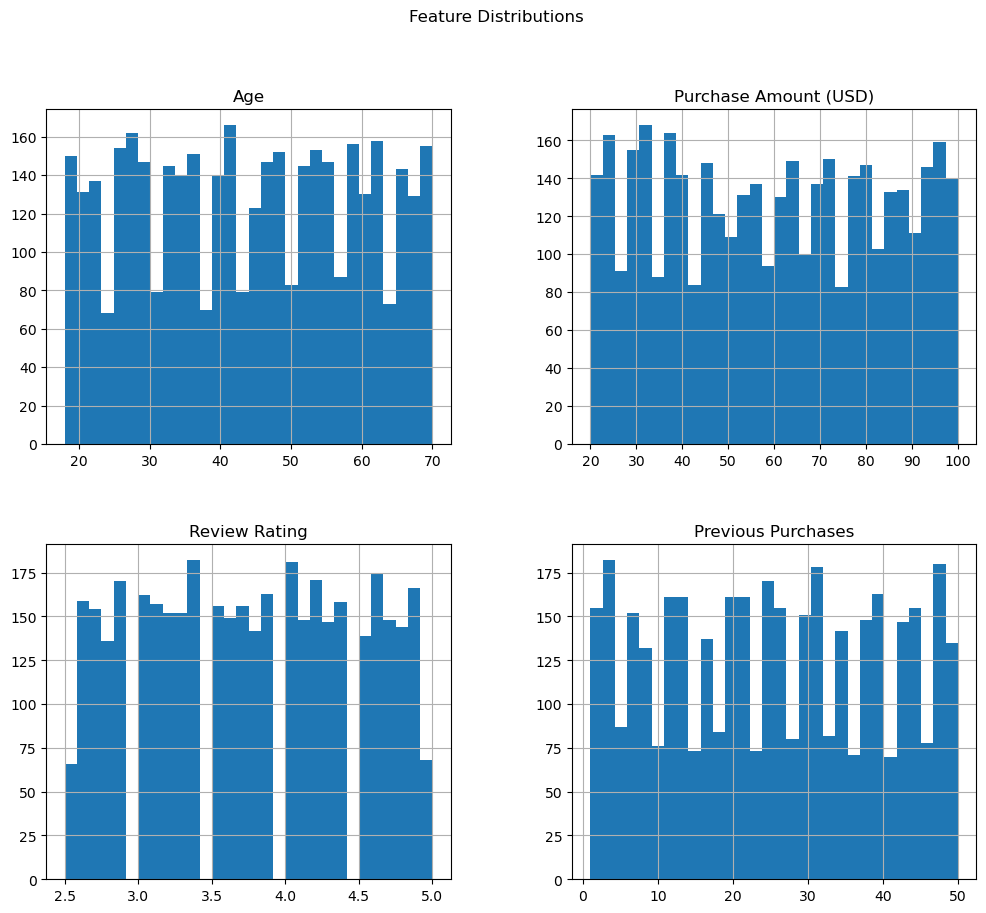

In [17]:
# Check distributions of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

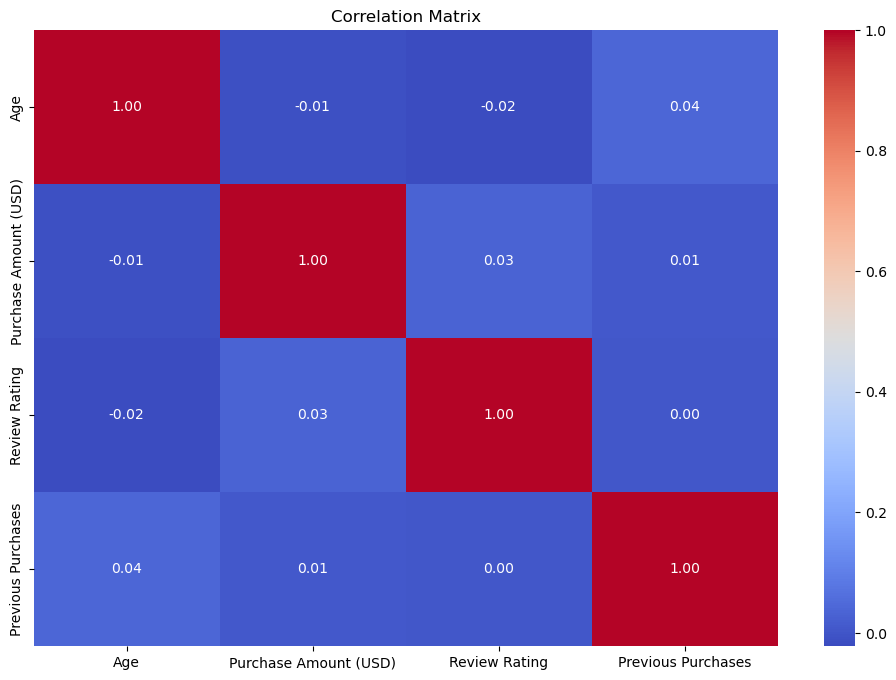

In [18]:
# Check correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [23]:
class DataPreprocessor:
    def __init__(self):
        self.num_imputer = None
        self.cat_imputer = None
        self.scaler = None
        self.num_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
        self.cat_features = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                           'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
                           'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
    
    def remove_outliers(self, df, columns, n_std=3):
        """
        Remove outliers from specified columns using z-score method
        """
        df_clean = df.copy()
        for column in columns:
            z_scores = np.abs(stats.zscore(df_clean[column]))
            df_clean = df_clean[z_scores < n_std]
        return df_clean
    
    def handle_missing_values(self, df, strategy='mean'):
        """
        Handle missing values in both numerical and categorical columns
        """
        if self.num_imputer is None:
            self.num_imputer = SimpleImputer(strategy=strategy)
            self.cat_imputer = SimpleImputer(strategy='most_frequent')
        
        df_clean = df.copy()
        
        # Handle numerical features
        df_clean[self.num_features] = self.num_imputer.fit_transform(df_clean[self.num_features])
        
        # Handle categorical features
        df_clean[self.cat_features] = self.cat_imputer.fit_transform(df_clean[self.cat_features])
        
        return df_clean
    
    def engineer_features(self, df):
        """
        Create new features and transform existing ones
        """
        df_engineered = df.copy()
        
        # Create age groups
        df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], 
                                          bins=[0, 25, 35, 50, 100],
                                          labels=['Young', 'Young Adult', 'Adult', 'Senior'])
        
        # Create price categories
        df_engineered['Price_Category'] = pd.qcut(df_engineered['Purchase Amount (USD)'],
                                                q=4, labels=['Budget', 'Medium', 'High', 'Premium'])
        
        # Create customer segments based on previous purchases
        df_engineered['Customer_Segment'] = pd.qcut(df_engineered['Previous Purchases'],
                                                  q=3, labels=['New', 'Regular', 'Loyal'])
        
        # Create dummy variables for categorical features
        df_encoded = pd.get_dummies(df_engineered, columns=self.cat_features)
        
        return df_encoded
    
    def scale_features(self, df, method='standard'):
        """
        Scale numerical features using specified scaling method
        """
        if self.scaler is None:
            self.scaler = StandardScaler() if method == 'standard' else MinMaxScaler()
        
        df_scaled = df.copy()
        df_scaled[self.num_features] = self.scaler.fit_transform(df_scaled[self.num_features])
        
        return df_scaled
    
    def select_features(self, df, threshold=0.1):
        """
        Select features based on variance for numerical columns and frequency for categorical columns
        """
        df_selected = df.copy()
        
        # Handle numerical and categorical columns separately
        numerical_columns = df_selected.select_dtypes(include=['int64', 'float64']).columns
        categorical_columns = df_selected.select_dtypes(include=['object', 'category']).columns
        
        # For numerical columns: remove low variance features
        if len(numerical_columns) > 0:
            variances = df_selected[numerical_columns].var()
            low_variance_features = variances[variances < threshold].index
            df_selected = df_selected.drop(columns=low_variance_features)
        
        # For categorical columns: remove features with a single unique value
        if len(categorical_columns) > 0:
            for col in categorical_columns:
                if df_selected[col].nunique() == 1:
                    df_selected = df_selected.drop(columns=[col])
        
        return df_selected
    
    def preprocess_data(self, df, remove_outliers=True, handle_missing=True, 
                       engineer_features=True, scale_features=True, select_features=True):
        """
        Complete preprocessing pipeline
        """
        df_processed = df.copy()
        
        if remove_outliers:
            df_processed = self.remove_outliers(df_processed, self.num_features)
            
        if handle_missing:
            df_processed = self.handle_missing_values(df_processed)
            
        if engineer_features:
            df_processed = self.engineer_features(df_processed)
            
        if scale_features:
            df_processed = self.scale_features(df_processed)
            
        if select_features:
            df_processed = self.select_features(df_processed)
            
        return df_processed

In [24]:
preprocessor = DataPreprocessor()

# Preprocess the data
df_processed = preprocessor.preprocess_data(df)

# Check the shape of processed data
print("Original data shape:", df.shape)
print("Processed data shape:", df_processed.shape)

# Display first few rows of processed data
print("\nFirst few rows of processed data:")
print(df_processed.head())

Original data shape: (3900, 17)
Processed data shape: (3900, 146)

First few rows of processed data:
        Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0  0.718913              -0.285629      -0.907584           -0.785831   
1 -1.648629               0.178852      -0.907584           -1.616552   
2  0.390088               0.558882      -0.907584           -0.162789   
3 -1.517099               1.276716      -0.349027            1.637107   
4  0.061263              -0.454531      -1.466141            0.391025   

  Age_Group Price_Category Customer_Segment  Gender_Female  Gender_Male  \
0    Senior         Medium              New          False         True   
1     Young           High              New          False         True   
2     Adult           High          Regular          False         True   
3     Young        Premium            Loyal          False         True   
4     Adult         Medium          Regular          False         True   

   Item P

The preprocessing pipeline will:

Remove outliers from numerical features
Handle any missing values
Engineer new features including age groups and customer segments
Create dummy variables for categorical features
Scale numerical features
Select relevant features based on variance and uniqueness

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

class ModelEvaluator:
    def __init__(self, is_classification=True):
        self.is_classification = is_classification
        self.models = {}
        self.fitted_models = {}  # Store fitted models
        self.cv_results = {}
        self.feature_importance = {}
        self.errors_analysis = {}
        
        # Initialize different models
        if self.is_classification:
            self.models = {
                'logistic': LogisticRegression(max_iter=1000),
                'naive_bayes': GaussianNB(),
                'svm': SVC(kernel='rbf', probability=True),
                'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
                'neural_net': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
            }
        else:
            self.models = {
                'linear': LinearRegression(),
                'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
                'neural_net': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
            }

    def sample_data(self, X, y, sample_size=10000):
        """
        Sample data if dataset is too large
        """
        if len(X) > sample_size:
            np.random.seed(42)
            idx = np.random.choice(len(X), sample_size, replace=False)
            return X.iloc[idx], y.iloc[idx]
        return X, y

    def evaluate_models(self, X, y, n_folds=5):
        """
        Evaluate all models using cross-validation
        """
        X_sampled, y_sampled = self.sample_data(X, y)
        
        for name, model in self.models.items():
            print(f"Evaluating {name}...")
            
            try:
                # Perform cross-validation
                scores = cross_val_score(
                    model, X_sampled, y_sampled, 
                    cv=n_folds, 
                    scoring='accuracy' if self.is_classification else 'neg_mean_squared_error',
                    n_jobs=-1
                )
                
                self.cv_results[name] = {
                    'mean_score': scores.mean(),
                    'std_score': scores.std(),
                    'all_scores': scores
                }
                
                # Fit model on full sampled dataset
                model_clone = type(model)(**model.get_params())
                model_clone.fit(X_sampled, y_sampled)
                self.fitted_models[name] = model_clone
                
                # Calculate feature importance if available
                if hasattr(model_clone, 'feature_importances_'):
                    self.feature_importance[name] = pd.Series(
                        model_clone.feature_importances_,
                        index=X_sampled.columns
                    ).sort_values(ascending=False)
                
                # For linear models, use coefficients
                elif hasattr(model_clone, 'coef_'):
                    coef = model_clone.coef_[0] if self.is_classification and len(model_clone.coef_.shape) > 1 else model_clone.coef_
                    self.feature_importance[name] = pd.Series(
                        np.abs(coef),
                        index=X_sampled.columns
                    ).sort_values(ascending=False)
                    
            except Exception as e:
                print(f"Error evaluating {name}: {str(e)}")
                continue

    def analyze_errors(self, X, y):
        """
        Analyze errors made by each model
        """
        X_sampled, y_sampled = self.sample_data(X, y)
        
        for name, model in self.fitted_models.items():
            try:
                # Make predictions
                y_pred = model.predict(X_sampled)
                
                # Store errors
                if self.is_classification:
                    self.errors_analysis[name] = {
                        'classification_report': classification_report(y_sampled, y_pred),
                        'misclassified_indices': np.where(y_pred != y_sampled)[0]
                    }
                else:
                    errors = y_sampled - y_pred
                    mse = mean_squared_error(y_sampled, y_pred)
                    rmse = np.sqrt(mse)
                    r2 = model.score(X_sampled, y_sampled)
                    
                    self.errors_analysis[name] = {
                        'mse': mse,
                        'rmse': rmse,
                        'r2': r2,
                        'largest_error_indices': np.abs(errors).argsort()[-10:]
                    }
                    
                    # Additional error analysis for regression
                    error_df = pd.DataFrame({
                        'Actual': y_sampled,
                        'Predicted': y_pred,
                        'Error': errors
                    })
                    self.errors_analysis[name]['error_stats'] = error_df.describe()
                    
            except Exception as e:
                print(f"Error analyzing {name}: {str(e)}")
                continue

    def get_top_models(self, n_models=3):
        """
        Return top n models based on cross-validation scores
        """
        if not self.cv_results:
            return []
            
        sorted_models = sorted(
            self.cv_results.items(),
            key=lambda x: x[1]['mean_score'],
            reverse=not self.is_classification
        )
        return [model[0] for model in sorted_models[:n_models]]

    def print_results(self):
        """
        Print evaluation results
        """
        if not self.cv_results:
            print("No results to display. Please run evaluate_models first.")
            return
            
        print("\nModel Evaluation Results:")
        print("-" * 50)
        
        for name in self.fitted_models.keys():
            print(f"\nModel: {name}")
            
            if name in self.cv_results:
                if self.is_classification:
                    print(f"Mean CV Accuracy: {self.cv_results[name]['mean_score']:.4f} ± {self.cv_results[name]['std_score']:.4f}")
                else:
                    print(f"Mean CV MSE: {-self.cv_results[name]['mean_score']:.4f} ± {self.cv_results[name]['std_score']:.4f}")
            
            if name in self.feature_importance:
                print("\nTop 5 Important Features:")
                print(self.feature_importance[name].head())
            
            if name in self.errors_analysis:
                print("\nError Analysis:")
                if self.is_classification:
                    print("\nClassification Report:")
                    print(self.errors_analysis[name]['classification_report'])
                else:
                    print(f"\nRegression Metrics:")
                    print(f"MSE: {self.errors_analysis[name]['mse']:.4f}")
                    print(f"RMSE: {self.errors_analysis[name]['rmse']:.4f}")
                    print(f"R2 Score: {self.errors_analysis[name]['r2']:.4f}")
                    print("\nError Statistics:")
                    print(self.errors_analysis[name]['error_stats'])